### Running Simulation Model
##### Jack Tobin
##### 30 September 2021

##### Updated 27th June 2022 with C++ backend

First we'll import some packages and the simulation class we constructed earlier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import norm
import seaborn as sns

# local simulation file
from simulation import Simulation

Next we'll set some high-level simulation paramters such as initial wealth, return and stdevs etc.

In [2]:
# set model parameters
initial_wealth = 1000  # £1000
ann_return = 0.09
ann_stdev = 0.18
num_trials = 10000
num_years = 5

Next we'll build the Simulation object and run it.

In [10]:
# instantiate Simulation class
sim = Simulation(initial_wealth, ann_return, ann_stdev, num_trials, num_years)

# run the model
sim.simulate_values()

# get returns and values generated by the model as nice dataframes
values = pd.DataFrame(sim.values)
ann_returns = pd.DataFrame(sim.returns)
daily_returns = pd.DataFrame(sim.daily_returns)

# compute daily values
daily_values = daily_returns.add(1).cumprod(axis=1).multiply(1000)  # 1000 gbp

# display
daily_values.head()

,0,1,2,3,4,5,6,7,8,9,...,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259
0,1000.029279,992.837685,998.857311,991.761073,992.942273,999.412441,1000.605271,997.604296,1001.997230,1004.446118,...,685.061827,682.633131,680.625787,678.252595,682.573997,674.922186,677.922622,675.300571,675.547864,677.330966
1,1006.706713,1004.299951,1005.024166,1029.465075,1035.967204,1036.147478,1023.990480,1024.749909,1016.822594,1030.512431,...,1669.010665,1706.731189,1705.856759,1718.075668,1710.437412,1725.062149,1717.473407,1751.510987,1745.494158,1788.091059
2,1008.874433,980.209289,954.626530,968.638882,973.253954,975.804186,966.735010,970.122243,967.878285,968.351635,...,1994.244317,1992.353978,1981.872819,1986.050022,1972.095990,1969.584382,1973.072671,1942.739957,1936.530398,1921.789989
3,988.241334,987.085680,983.666845,991.139248,999.800476,1006.712142,1010.681386,1013.502114,1007.631168,1011.756551,...,886.163222,900.771299,911.553287,907.017443,907.822782,900.393269,904.393306,901.242594,899.860049,899.272952
4,1003.922938,1013.307603,1002.828571,993.852705,1014.964321,1033.689990,1034.124377,1030.163683,1026.853749,1037.055081,...,878.514660,878.740348,875.184711,876.940621,883.958872,885.820523,879.612394,881.945136,880.355463,872.981051


Lets plot a sample of 100 paths.

Text(0.5, 0.98, '100 Simulated Portfolios')

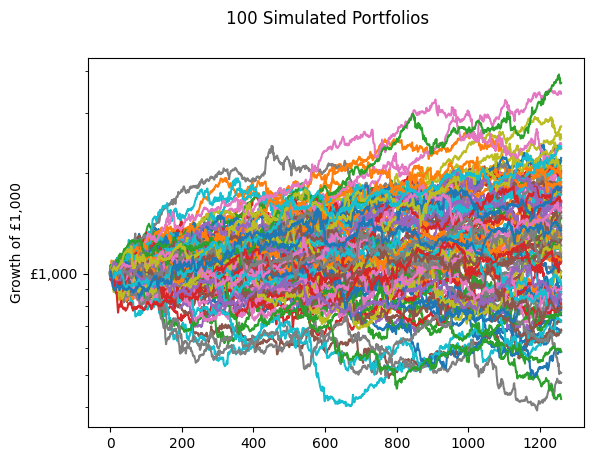

In [11]:
# subset
n_paths = 100
sample = daily_values.loc[:n_paths, :].copy()

# create plot
fig, ax = plt.subplots(1)
for i in range(len(sample)):
    ax.plot(sample.loc[i, :])
ax.set_yscale('log')  # to control for visual scale
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('£{x:,.0f}'))  # £ format
ax.set_ylabel('Growth of £1,000')
fig.suptitle(str(n_paths) + ' Simulated Portfolios')

Next we'll show the 25th, 50th and 75th percentile across all simulated portfolios over time.

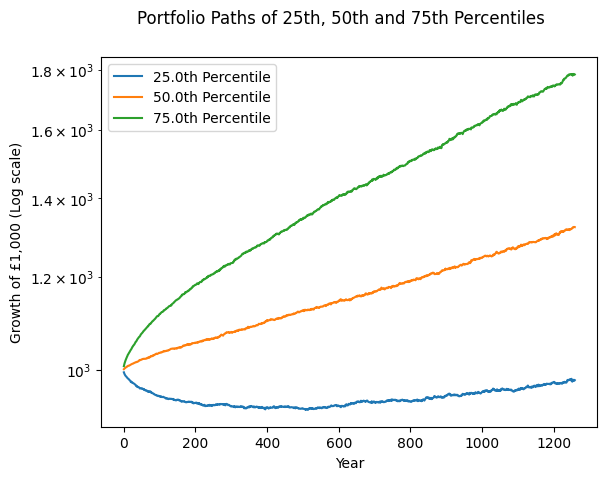

In [12]:
# convert values to the three percentiles
qs = [0.25, 0.50, 0.75]
percentiles = daily_values.quantile(q=qs, axis=0)

# make plot
fig, ax = plt.subplots(1)
for q in qs:
    ax.plot(percentiles.loc[q, :], label='%sth Percentile' % str(round(q * 100,0)))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('£{x:,.0f}')) # £ format
ax.set_xlabel('Year')
ax.set_ylabel('Growth of £1,000 (Log scale)')
ax.set_yscale('log')
fig.suptitle('Portfolio Paths of 25th, 50th and 75th Percentiles')
ax.legend(loc='upper left')

Next let's plot a histogram of the portfolio returns to visualize any skew we generated with the markov chain process.

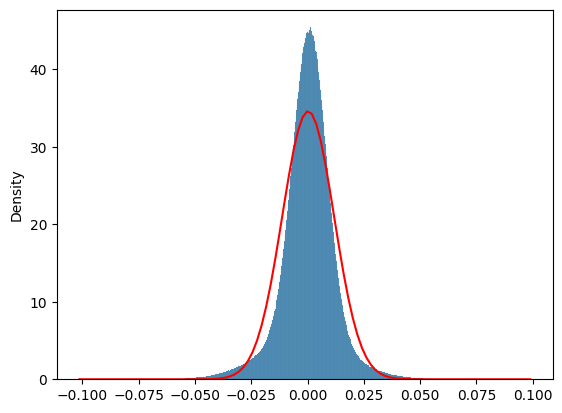

In [14]:
# daily returns
rets = daily_returns.to_numpy().ravel()

# create initial histogram plot
fig, ax = plt.subplots(1)
sns.histplot(rets, kde=False, stat='density', ax=ax)

# overlay normal distribution
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
mu, std = norm.fit(rets)
x_pdf = np.linspace(x0, x1, 100)
y_pdf = norm.pdf(x_pdf, mu, std)
ax.plot(x_pdf, y_pdf, color='red')

Based on the histogram with overlaid normal distribution we can see that the simulated data is fat tailed i.e. relatively higher frequency of both near-zero and extreme values with relatively lower occurrence of in-between values compared with that of a normal distribution.

This shows that we've successfully simulated returns that exhibit the 'fat tails' of actual return distributions. Our simulated returns have both a higher chance of small returns and extremely negative returns compared with what a normal distribution would predict.